In [1]:
import numpy as np
import pandas as pd

In [2]:
df_2= pd.read_csv('user1_data.csv')
df_2.head()

,ttime,pm1,pm2,pm3,am,sm,st,lum
0,18-07-2022 15:42,3.63,0.0,0.0,3.2,7813,25.65,15001
1,18-07-2022 15:47,4.19,0.0,0.0,4.8,7692,25.66,13863
2,18-07-2022 15:52,4.74,0.0,0.0,4.0,7813,25.67,13788
3,18-07-2022 15:57,5.30,0.0,0.0,4.8,7813,25.68,14383
4,18-07-2022 16:02,0.55,5.3,5.3,3.2,7813,25.69,14621


In [3]:
df_2.columns

Index(['ttime', 'pm1', 'pm2', 'pm3', 'am', 'sm', 'st', 'lum'], dtype='object')

In [4]:
X= df_2[[ 'pm3','am','st', 'lum']]
y=df_2['sm']

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 101)

In [6]:
from sklearn.ensemble import RandomForestRegressor
rfc = RandomForestRegressor(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestRegressor()

In [7]:
rfc_pred = rfc.predict(X_test)

In [8]:
from sklearn import metrics

In [9]:
metrics.mean_squared_error(rfc_pred,y_test)

64985.329459128436

In [10]:
def squared_error(y_pred,y_train):
    return sum((y_pred - y_train) * (y_pred- y_train))

In [11]:
from statistics import mean

In [12]:
def coefficient_of_determination(y_pred,y_train):
    y_mean_line = [mean(y_pred) for y in y_train]
    squared_error_regr = squared_error(y_pred, y_train)
    squared_error_y_mean = squared_error(y_pred, y_mean_line)
    return 1 - squared_error_regr/squared_error_y_mean

In [13]:
r_squared = coefficient_of_determination(rfc_pred,y_test)
print(r_squared) #R2 score for user1

0.9922407322964184


In [14]:
metrics.mean_absolute_error(rfc_pred,y_test)

114.52402434774427

In [15]:
rmse= np.sqrt(metrics.mean_squared_error(rfc_pred,y_test))
rmse

254.92220275826983

In [16]:
import matplotlib.pyplot as plt

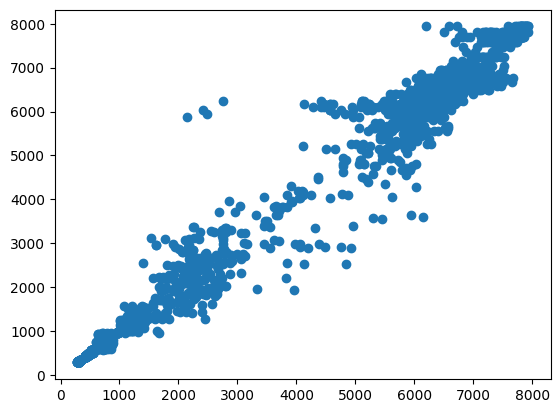

In [17]:
plt.scatter(rfc_pred,y_test)